In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Split train test 
import splitfolders 
splitfolders.ratio("/content/drive/MyDrive/dataset bangkit", output="food-data", seed=1337, ratio=(.8, .2), group_prefix=None) 

Copying files: 2180 files [00:23, 92.55 files/s] 


In [ ]:
training_dir = os.path.join('food-data/', 'train')
testing_dir = os.path.join('food-data/', 'val')

In [ ]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	training_dir,
	target_size=(224, 224),
  color_mode='rgb',
	class_mode='categorical',
  batch_size=32,
  shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
	testing_dir,
	target_size=(224, 224),
  color_mode='rgb',
	class_mode='categorical',
  batch_size=32,
  shuffle=True,
)

Found 1734 images belonging to 21 classes.
Found 441 images belonging to 21 classes.


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(21, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)


print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=[myCallback()]
)

Epoch 1/100
55/55 [==============================] - 141s 3s/step - loss: 0.3201 - accuracy: 0.8899 - val_loss: 0.5505 - val_accuracy: 0.8186
Epoch 2/100
55/55 [==============================] - 113s 2s/step - loss: 0.2884 - accuracy: 0.9043 - val_loss: 0.5373 - val_accuracy: 0.8345
Epoch 3/100
55/55 [==============================] - 112s 2s/step - loss: 0.2687 - accuracy: 0.9037 - val_loss: 0.4680 - val_accuracy: 0.8413
Epoch 4/100
55/55 [==============================] - 111s 2s/step - loss: 0.2266 - accuracy: 0.9296 - val_loss: 0.4624 - val_accuracy: 0.8685
Epoch 5/100
55/55 [==============================] - 111s 2s/step - loss: 0.2223 - accuracy: 0.9285 - val_loss: 0.5618 - val_accuracy: 0.8322
Epoch 6/100
55/55 [==============================] - 111s 2s/step - loss: 0.2030 - accuracy: 0.9314 - val_loss: 0.5188 - val_accuracy: 0.8413
Epoch 7/100
55/55 [==============================] - 112s 2s/step - loss: 0.1898 - accuracy: 0.9354 - val_loss: 0.5488 - val_accuracy: 0.8209
Epoch 

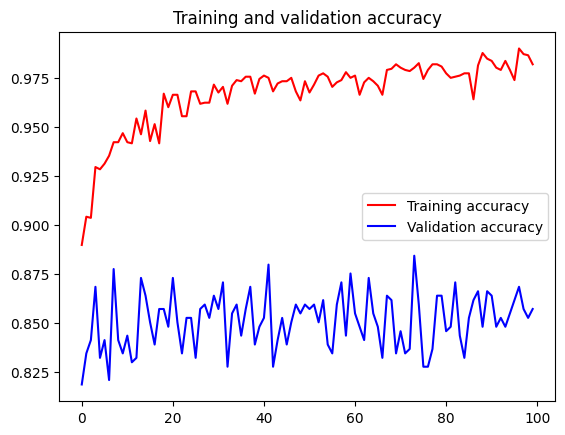

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save_weights('foodModel1.h5')
print('Model Saved!')

Model Saved!


In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']